In [72]:
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
tf.compat.v1.enable_eager_execution()
import pathlib

fig_w,fig_h = 20,10
plt.rcParams['figure.figsize'] = [fig_w,fig_h]

In [74]:
data_fld = os.path.join('data','mini_data')
mask_fld = os.path.join('data','mini_data','masks')

data_dir = pathlib.Path(data_fld)

data_df = pd.read_csv('data/train.csv')
data_df = data_df[data_df['EncodedPixels'].isnull()==False]

'Fish'

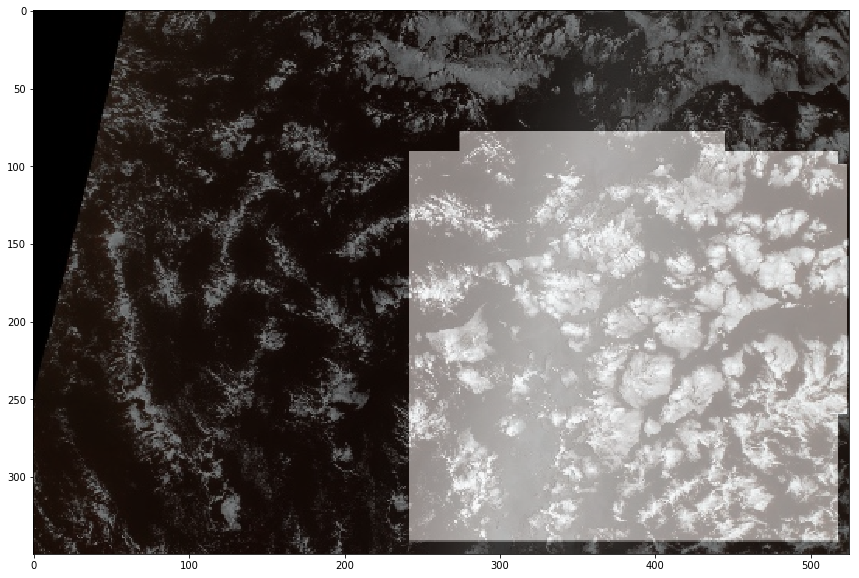

In [62]:
data = []
lables = []
for row in data_df.iterrows():
    img_name,img_lable = row[1]["Image_Label"].split('_')
    
    img = cv2.imread(os.path.join(data_fld,img_name))
    mask = cv2.imread(os.path.join(mask_fld,img_name))
    
    data.append(img)
    lables.append((mask,img_lable))
    
plt.imshow(data[0])
plt.imshow(lables[0][0],alpha=0.5)
lables[0][1]

In [77]:
TRAIN_LENGTH = data_df.size
BATCH_SIZE = 64
BUFFER_SIZE = 1000
STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE

IMG_HEIGHT, IMG_WIDTH,_ = data[0].shape
CLASS_NAMES = ["sugar","fish","gravel","flower"]

In [109]:
print(data_fld)
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
train_data_gen = image_generator.flow_from_directory(directory=data_fld,
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES))

data\mini_data
Found 11836 images belonging to 4 classes.


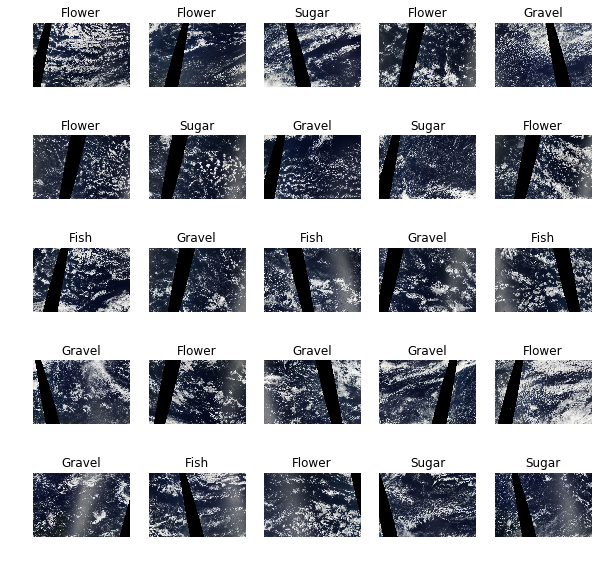

In [110]:
def show_batch(image_batch, label_batch):
    plt.figure(figsize=(10,10))
    for n,_ in enumerate(image_batch):
        if n==25:
            break
        ax = plt.subplot(5,5,n+1)
        plt.imshow(image_batch[n])
        c_idx = np.argmax(label_batch[n])
        plt.title(CLASS_NAMES[c_idx].title())
        plt.axis('off')
        
image_batch, label_batch = next(train_data_gen)
show_batch(image_batch, label_batch)